In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


/Users/heonyounglee/Desktop/ocr/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
vet_list = pd.read_csv('./fulldata_02_03_01_P_동물병원.csv', encoding='euc-kr').loc[:, ['영업상태명', '사업장명']]
vet_list = vet_list.loc[vet_list['영업상태명'] == '영업/정상']

vet_list


In [3]:
vet_list.columns

Index(['영업상태명', '사업장명'], dtype='object')

In [ ]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
vet_list_label = vet_list
vet_list_label['업종'] = 1 # 0: 기타 , 1: 동물병원

# vet_list_label.columns

vet_list_label = vet_list_label.iloc[:, 1:]
vet_list_label

In [5]:
# 인코딩을 위한 단어 사이 공백 추가
replace_str = ['가축', '병원', '동물', '메디컬', '센터', '의료', '고양이', '애견', '안과', '치과', '피부', '노령', '심장', '외과', '수술', '암', '관절', '파충류', '전문', '출장', '진료', '종합', '펫', '수의', '클리닉', '24시', '25시', '양·한방', '한방', '부설', '응급', '의원', '임상병리', '축산', '농협', '축협', '협동조합']

for i in replace_str:
    vet_list_label['사업장명'] = vet_list_label['사업장명'].str.replace(i, f' {i} ')

vet_list_label['사업장명'] = vet_list_label['사업장명'].str.strip()
vet_list_label


,사업장명,업종
4771,문경 가축 병원,1
4827,일곡 동물 병원,1
4828,우리 동물 병원,1
4829,참좋은 동물 병원,1
4830,빛고을 동물 의료 센터,1
...,...,...
10029,서림 동물 병원,1
10030,다솜 동물 메디컬 센터 금정점,1
10031,다솜 고양이 메디컬 센터 금정점,1
10032,포레스트 동물 의료 센터,1


In [6]:
X_data = vet_list_label['사업장명']
y_data = vet_list_label['업종']

len(X_data), len(y_data)

(5208, 5208)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

tokenizer = Tokenizer(num_words = 2740 -2072 +1) # total_cnt, rare_cnt -> 2782, 2149
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

X_train_encoded[:5]

[[1, 2], [173, 1, 2], [1, 2], [1, 6, 3], [12, 3, 1, 2]]

In [8]:
word_to_index = tokenizer.word_index

word_to_index

{'동물': 1,
 '병원': 2,
 '센터': 3,
 '의료': 4,
 '종합': 5,
 '메디컬': 6,
 '펫': 7,
 '24시': 8,
 '전문': 9,
 '출장': 10,
 '진료': 11,
 '가축': 12,
 '축협': 13,
 '현대': 14,
 '우리': 15,
 '축산': 16,
 '서울': 17,
 '수의': 18,
 '원': 19,
 '쿨': 20,
 '과': 21,
 '중앙': 22,
 '바른': 23,
 '제일': 24,
 '클리닉': 25,
 '암': 26,
 '웰니스': 27,
 '고려': 28,
 '수': 29,
 '하나': 30,
 '행복한': 31,
 '사랑': 32,
 '강남': 33,
 '협동조합': 34,
 '산업': 35,
 '정': 36,
 '고양이': 37,
 '」': 38,
 '농협': 39,
 '「산업': 40,
 '김': 41,
 '튼튼': 42,
 '삼성': 43,
 '치과': 44,
 '업': 45,
 '가람': 46,
 '한마음': 47,
 '센트럴': 48,
 '한국': 49,
 '한방': 50,
 '외과': 51,
 '푸른': 52,
 '굿모닝': 53,
 '대구': 54,
 '한빛': 55,
 '스마트': 56,
 '대한': 57,
 '미래': 58,
 '가나': 59,
 '한솔': 60,
 '박': 61,
 '마리': 62,
 '다나': 63,
 '부속': 64,
 'dr': 65,
 '늘푸른': 66,
 '베스트': 67,
 '로얄': 68,
 '도그플러스': 69,
 '더': 70,
 '도담': 71,
 '라온': 72,
 '약품': 73,
 '금강': 74,
 '노아': 75,
 '스마일': 76,
 '조은': 77,
 '안과': 78,
 '보호': 79,
 '그린': 80,
 '숲속': 81,
 '25시': 82,
 '닥터': 83,
 '광주': 84,
 '초원': 85,
 '정다운': 86,
 '온누리': 87,
 '마루': 88,
 '한사랑': 89,
 '부설': 90,
 '아프리카':

In [9]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt += 1
        rare_freq += 1

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 2072
단어 집합(vocabulary)에서 희귀 단어의 비율: 75.62043795620438
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.34108527131783


In [10]:
vocab_size = len(word_to_index) + 1
vocab_size

2741

상호의 최대 길이 : 13
상호의 평균 길이 : 2.970715


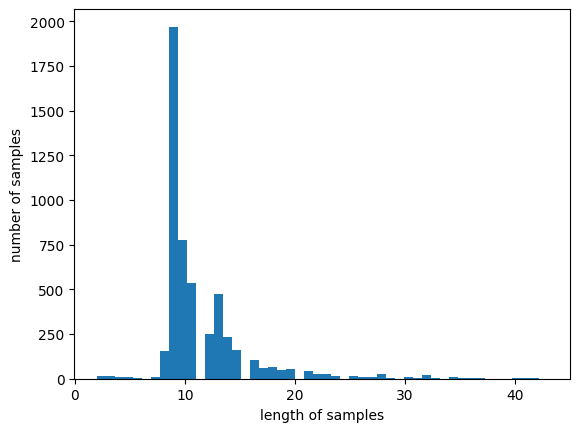

In [11]:
print('상호의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('상호의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
max_len = 13
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4166, 13)

In [13]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9153 - loss: 0.1856 - val_acc: 1.0000 - val_loss: 0.0075
Epoch 2/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0050 - val_acc: 1.0000 - val_loss: 0.0012
Epoch 3/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 9.0607e-04 - val_acc: 1.0000 - val_loss: 3.4487e-04
Epoch 4/4
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.7878e-04 - val_acc: 1.0000 - val_loss: 1.4812e-04


In [14]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - acc: 1.0000 - loss: 1.4772e-04

 테스트 정확도: 1.0000


In [19]:
input_encoded = tokenizer.texts_to_sequences('행복 24시 동물 병원')
input_padded = pad_sequences(input_encoded, maxlen=max_len)

model.predict(input_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9996497],
       [0.9997013]], dtype=float32)

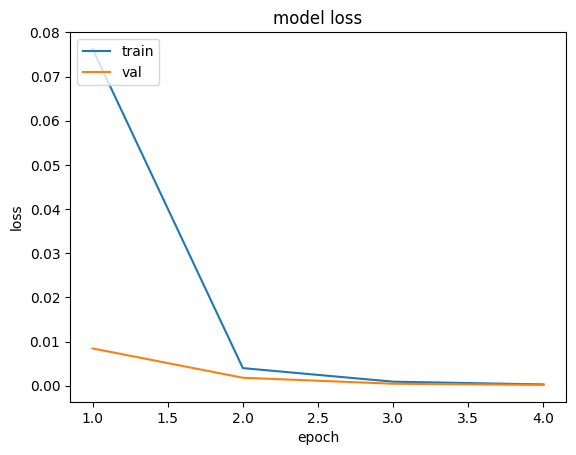

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 모델저장
from keras.models import load_model

model.save('rnn_model_240702.h5')

In [2]:
from ultralytics import YOLO


In [6]:
model = YOLO("yolov8n-seg.pt")

model.train(data='./receipts segmentation/data.yaml', epochs=100, imgsz=640)

# results = model('../img/ocr_pre.jpg')

Ultralytics YOLOv8.2.48 🚀 Python-3.9.6 torch-2.3.1 CPU (Apple M2)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=./receipts segmentation/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /Users/heonyounglee/Desktop/ocr/classification/receipts segmentation/train/labels... 241 images, 0 backgrounds, 0 corrupt: 100%|██████████| 241/241 [00:00<00:00, 2430.56it/s]

train: New cache created: /Users/heonyounglee/Desktop/ocr/classification/receipts segmentation/train/labels.cache



val: Scanning /Users/heonyounglee/Desktop/ocr/classification/receipts segmentation/valid/labels... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<00:00, 2795.12it/s]

val: New cache created: /Users/heonyounglee/Desktop/ocr/classification/receipts segmentation/valid/labels.cache


Plotting labels to /Users/heonyounglee/Desktop/ocr/runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/heonyounglee/Desktop/ocr/runs/segment/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      2.039      4.328        3.3       1.94          6        640: 100%|██████████| 16/16 [02:55<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.39s/it]

                   all         55        120    0.00939      0.813      0.175      0.083    0.00902      0.818      0.168     0.0831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.574      1.571      2.319      1.575          6        640: 100%|██████████| 16/16 [02:54<00:00, 10.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.99s/it]

                   all         55        120      0.849      0.113      0.313      0.148      0.849      0.113        0.3      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.434      1.383      1.988      1.449         80        640:  12%|█▎        | 2/16 [00:25<02:58, 12.76s/it][ WARN:0@1554.237] global loadsave.cpp:241 findDecoder imread_('/Users/heonyounglee/Desktop/ocr/classification/receipts segmentation/train/images/-_jpg.rf.5bc66771d076a20d9a33787034bd1d4e.jpg'): can't open/read file: check file path/integrity
      3/100         0G      1.434      1.383      1.988      1.449         80        640:  12%|█▎        | 2/16 [00:25<02:59, 12.85s/it]


FileNotFoundError: Image Not Found /Users/heonyounglee/Desktop/ocr/classification/receipts segmentation/train/images/-_jpg.rf.5bc66771d076a20d9a33787034bd1d4e.jpg

In [3]:
!wget -0 receipts.zip https://app.roboflow.com/ds/pLLwDuyDmr?key=6aACv3QhVG

zsh:1: no matches found: https://app.roboflow.com/ds/pLLwDuyDmr?key=6aACv3QhVG
